In [2]:
# global imports

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

In [3]:
# read the data and print the first 10 rows
dataset = pd.read_csv(os.path.abspath('') + '/parkinsons.data')
dataset.head(11)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [4]:
status_data = dataset.loc[:, 'status'].values

variables = dataset.loc[:, dataset.columns != 'status'].values[:, 1:]

print("Input data: \n", variables)
print("Predicted Output: \n", status_data)
# Here Vizualization is not possible becuase data is raw so noise in data should be cleansed 1st.

Input data: 
 [[119.992 157.302 74.997 ... 0.266482 2.301442 0.284654]
 [122.4 148.65 113.819 ... 0.33559 2.486855 0.368674]
 [116.682 131.111 111.555 ... 0.311173 2.342259 0.332634]
 ...
 [174.688 240.005 74.287 ... 0.158453 2.679772 0.131728]
 [198.764 396.961 74.904 ... 0.207454 2.138608 0.123306]
 [214.289 260.277 77.973 ... 0.190667 2.555477 0.148569]]
Predicted Output: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


In [5]:
# Preprocess the data by normalization using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-2, 2))

normalized_features = scaler.fit_transform(variables)
print(normalized_features)

[[-1.26276692 -1.54963308 -1.78074084 ...  0.34306052 -0.43735486
  -0.0107616 ]
 [-1.20669259 -1.62027823 -0.88670881 ...  0.96534817 -0.10741912
   0.68530408]
 [-1.33984584 -1.76348735 -0.93884648 ...  0.74548365 -0.36472248
   0.38672985]
 ...
 [ 0.01092145 -0.87434806 -1.79709144 ... -0.62969391  0.23586972
  -1.27768066]
 [ 0.57157162  0.40722619 -1.78288254 ... -0.1884611  -0.72711209
  -1.34745292]
 [ 0.93309736 -0.7088235  -1.71220652 ... -0.33962077  0.01469125
  -1.138161  ]]


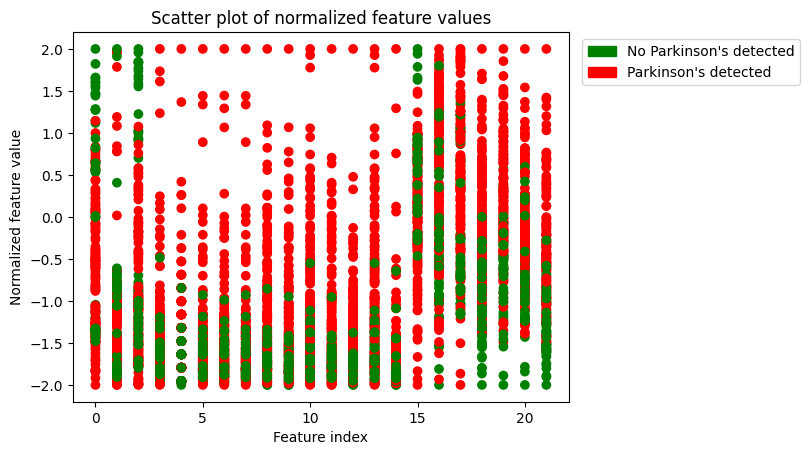

In [6]:
# Visualize the normalized deature data with their labels

# Define a custom color map that maps 0 to green and 1 to red
colors = ["green", "red"]
cmap = mcolors.ListedColormap(colors)

# Create a scatter plot of the normalized feature values
for i in range(normalized_features.shape[1]):
    plt.scatter([i]*len(status_data), normalized_features[:,i], c=status_data, cmap=cmap)

# Set axis labels and title
plt.xlabel('Feature index')
plt.ylabel('Normalized feature value')
plt.title('Scatter plot of normalized feature values')


# Create legend for the plot
green_patch = mpatches.Patch(color='green', label='No Parkinson\'s detected')
red_patch = mpatches.Patch(color='red', label='Parkinson\'s detected')
plt.legend(handles=[green_patch, red_patch],bbox_to_anchor=(1.48, 1), loc='upper right')

# Show the plot
plt.show()


In [7]:
# Divide the Entire dataset into multiple folds. Perform training and testing on each fold

from sklearn.model_selection import KFold

kf = KFold(n_splits=8, shuffle=True, random_state=34)

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.90      1.00      0.95        19

    accuracy                           0.92        25
   macro avg       0.95      0.83      0.88        25
weighted avg       0.93      0.92      0.91        25



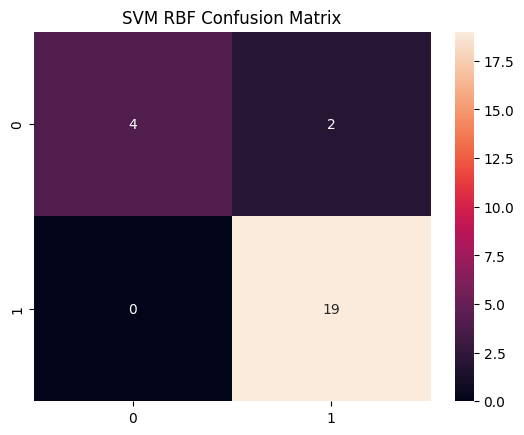

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.76      1.00      0.86        19

    accuracy                           0.76        25
   macro avg       0.38      0.50      0.43        25
weighted avg       0.58      0.76      0.66        25



/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


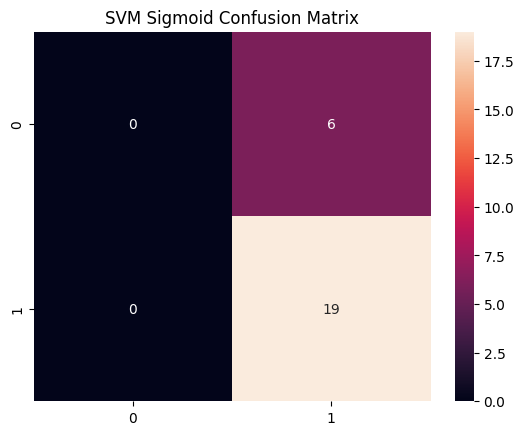

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.79      1.00      0.88        19

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



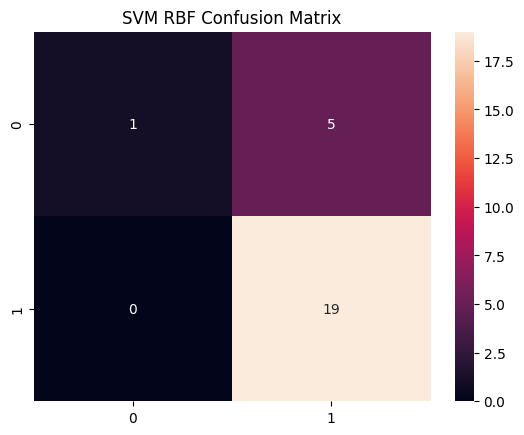

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.76      1.00      0.86        19

    accuracy                           0.76        25
   macro avg       0.38      0.50      0.43        25
weighted avg       0.58      0.76      0.66        25



/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


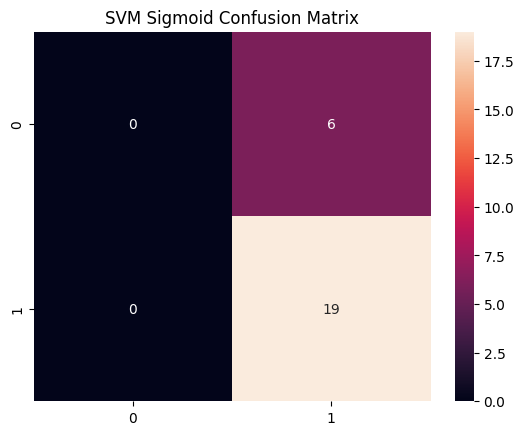

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.81      1.00      0.89        17

    accuracy                           0.84        25
   macro avg       0.90      0.75      0.78        25
weighted avg       0.87      0.84      0.82        25



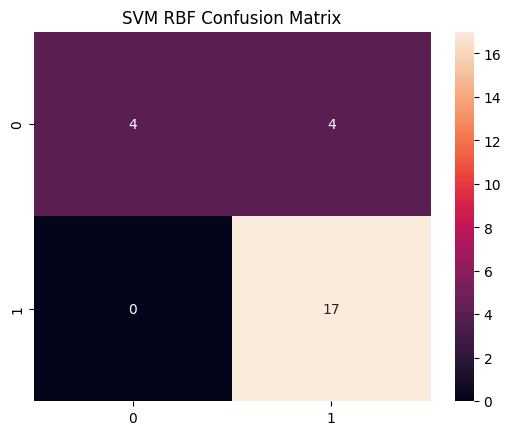

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.68      1.00      0.81        17

    accuracy                           0.68        25
   macro avg       0.34      0.50      0.40        25
weighted avg       0.46      0.68      0.55        25



/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


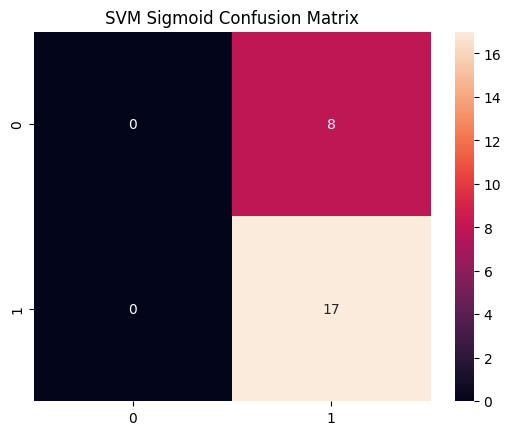

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.90      0.95      0.92        19

    accuracy                           0.88        24
   macro avg       0.82      0.77      0.79        24
weighted avg       0.87      0.88      0.87        24



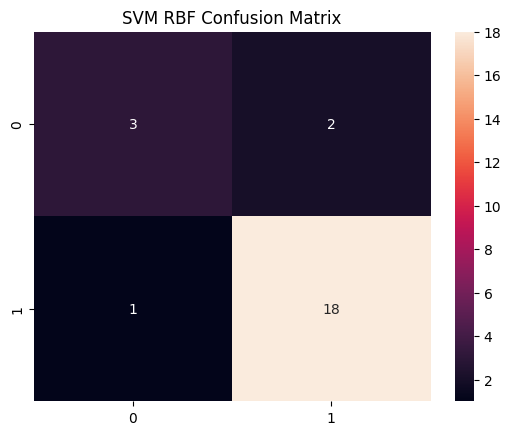

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.79      1.00      0.88        19

    accuracy                           0.79        24
   macro avg       0.40      0.50      0.44        24
weighted avg       0.63      0.79      0.70        24



/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


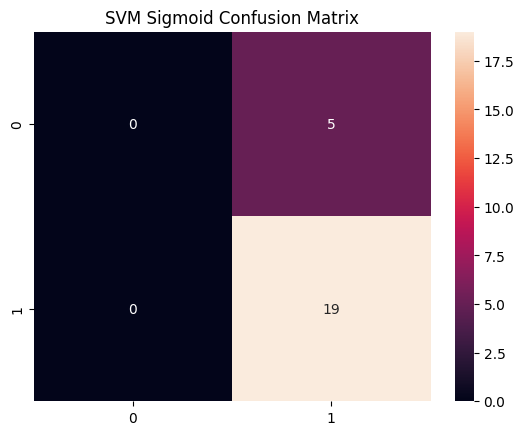

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.74      1.00      0.85        17

    accuracy                           0.75        24
   macro avg       0.87      0.57      0.55        24
weighted avg       0.82      0.75      0.67        24



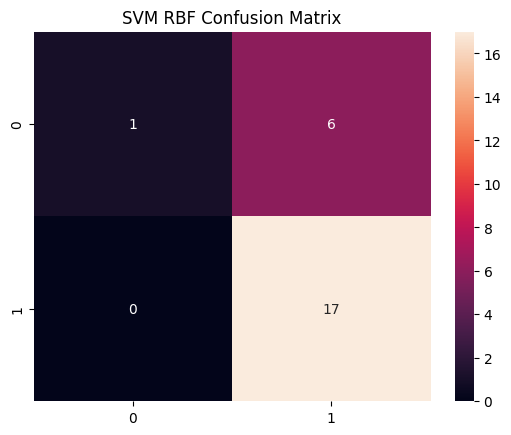

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.71      1.00      0.83        17

    accuracy                           0.71        24
   macro avg       0.35      0.50      0.41        24
weighted avg       0.50      0.71      0.59        24



/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


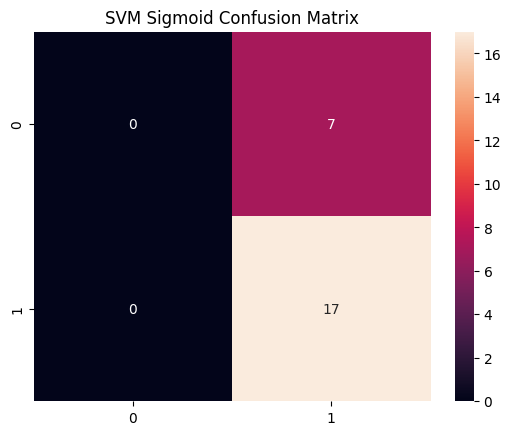

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.90      1.00      0.95        19

    accuracy                           0.92        24
   macro avg       0.95      0.80      0.85        24
weighted avg       0.92      0.92      0.91        24



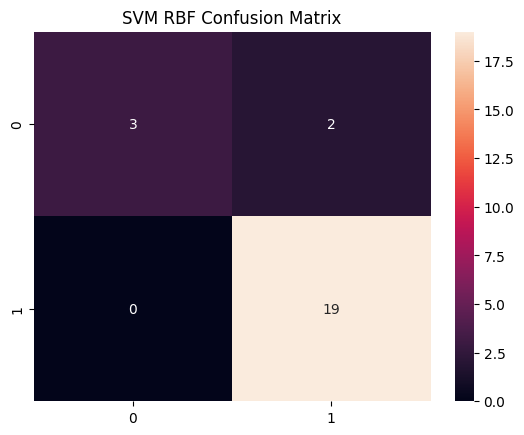

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.79      1.00      0.88        19

    accuracy                           0.79        24
   macro avg       0.40      0.50      0.44        24
weighted avg       0.63      0.79      0.70        24



/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


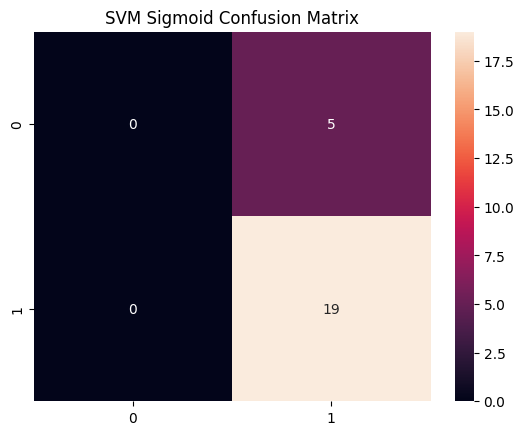

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.85      1.00      0.92        17

    accuracy                           0.88        24
   macro avg       0.93      0.79      0.82        24
weighted avg       0.89      0.88      0.86        24



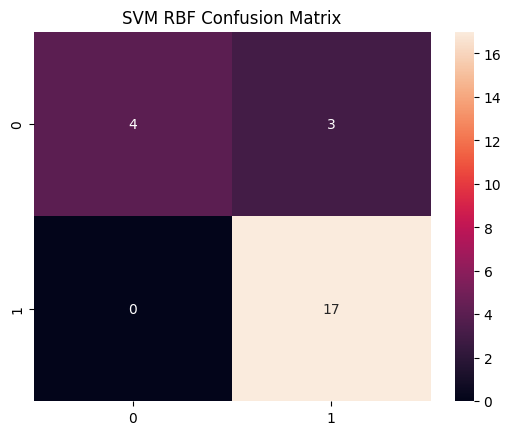

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.74      1.00      0.85        17

    accuracy                           0.75        24
   macro avg       0.87      0.57      0.55        24
weighted avg       0.82      0.75      0.67        24



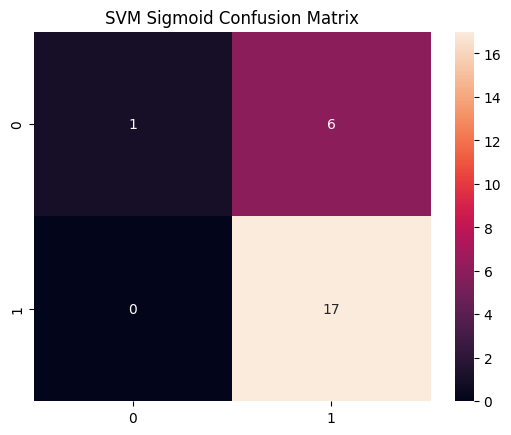

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.95      1.00      0.98        20

    accuracy                           0.96        24
   macro avg       0.98      0.88      0.92        24
weighted avg       0.96      0.96      0.96        24



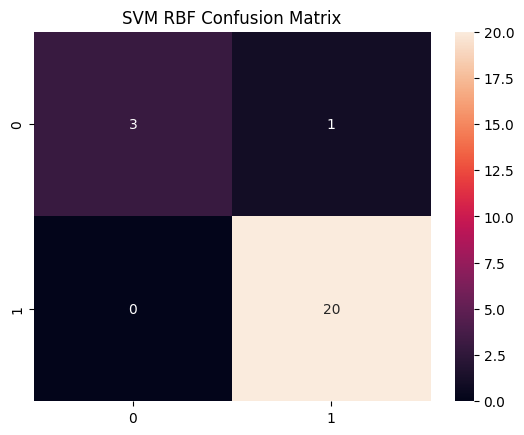

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.83      1.00      0.91        20

    accuracy                           0.83        24
   macro avg       0.42      0.50      0.45        24
weighted avg       0.69      0.83      0.76        24



/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rammanojpotla/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


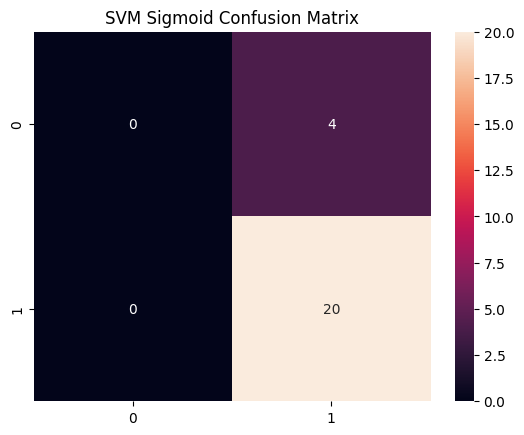

In [16]:
# Train and test using SimpleVector Machine modal
from sklearn.svm import SVC


classifier_svc_rbf =SVC(kernel ='rbf', random_state = 34)
classifier_svc_sig = SVC(kernel='sigmoid', random_state=34)
svm_rbf_score = []
svm_sig_score = []
svm_rbf_precision = []
svm_rbf_recall = []
svm_sig_precision = []
svm_sig_recall = []


for tr_ind, te_ind in kf.split(normalized_features):
    X_train, X_test = normalized_features[tr_ind], normalized_features[te_ind]
    Y_train, Y_test = status_data[tr_ind], status_data[te_ind]
    classifier_svc_rbf.fit(X_train,Y_train)
    classifier_svc_sig.fit(X_train, Y_train)
    svm_rbf_score.append(classifier_svc_rbf.score(X_test, Y_test))
    svm_sig_score.append(classifier_svc_sig.score(X_test, Y_test))
    svm_rbf_precision.append(precision_score(Y_test, classifier_svc_rbf.predict(X_test)))
    svm_rbf_recall.append(recall_score(Y_test, classifier_svc_rbf.predict(X_test)))
    svm_sig_precision.append(precision_score(Y_test, classifier_svc_sig.predict(X_test)))
    svm_sig_recall.append(recall_score(Y_test, classifier_svc_sig.predict(X_test)))
    
    
    
    # For each fold we calculate confusion matrix and visualize a heatmap
    svc_rbf_y_pred = classifier_svc_rbf.predict(X_test)
    print("Confusion Matrix: ")
    cf_matrix=confusion_matrix(Y_test, svc_rbf_y_pred)

    print("\nClassification Report:")
    print(classification_report(Y_test, svc_rbf_y_pred))


    sns.heatmap(cf_matrix, annot=True)
    plt.title(f"SVM RBF Confusion Matrix")
    plt.show()
    
    # For each fold we calculate confusion matrix and visualize a heatmap
    svc_sig_y_pred = classifier_svc_sig.predict(X_test)
    print("Confusion Matrix: ")
    cf_matrix=confusion_matrix(Y_test, svc_sig_y_pred)

    print("\nClassification Report:")
    print(classification_report(Y_test, svc_sig_y_pred))


    sns.heatmap(cf_matrix, annot=True)
    plt.title(f"SVM Sigmoid Confusion Matrix")
    plt.show()

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.95      0.95      0.95        19

    accuracy                           0.92        25
   macro avg       0.89      0.89      0.89        25
weighted avg       0.92      0.92      0.92        25



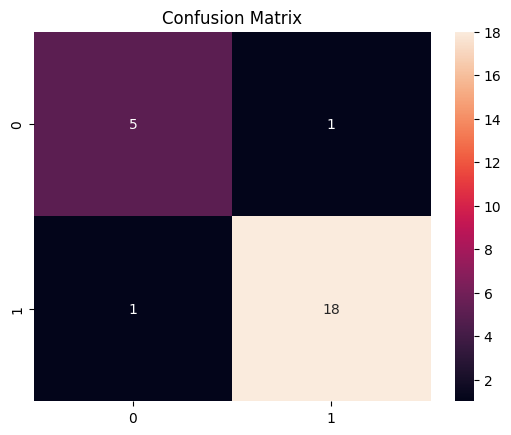

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.86      0.95      0.90        19

    accuracy                           0.84        25
   macro avg       0.80      0.72      0.75        25
weighted avg       0.83      0.84      0.83        25



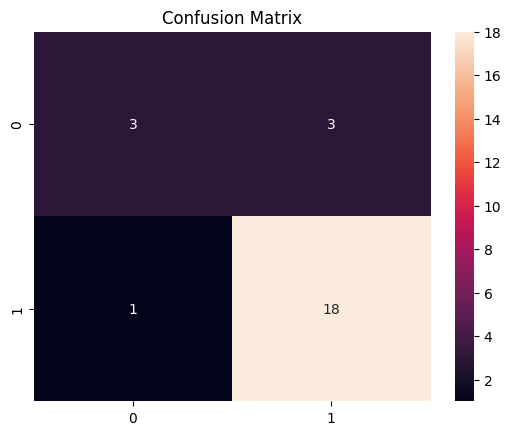

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.88      0.94        17

    accuracy                           0.92        25
   macro avg       0.90      0.94      0.91        25
weighted avg       0.94      0.92      0.92        25



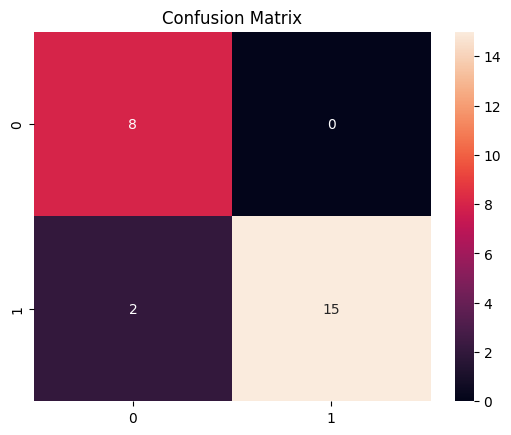

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.95      0.95      0.95        19

    accuracy                           0.92        24
   macro avg       0.87      0.87      0.87        24
weighted avg       0.92      0.92      0.92        24



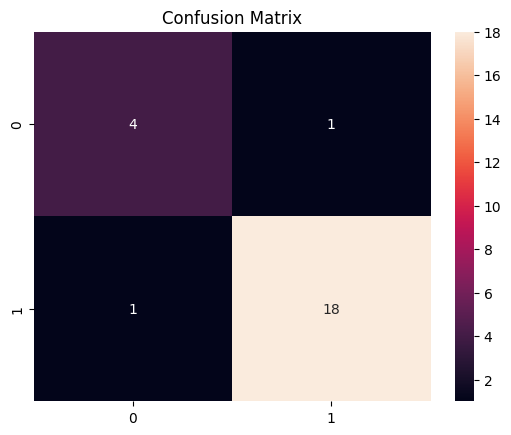

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.94      0.94      0.94        17

    accuracy                           0.92        24
   macro avg       0.90      0.90      0.90        24
weighted avg       0.92      0.92      0.92        24



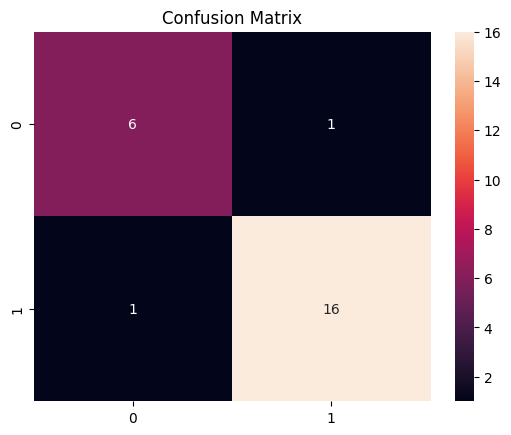

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.95      0.97        19

    accuracy                           0.96        24
   macro avg       0.92      0.97      0.94        24
weighted avg       0.97      0.96      0.96        24



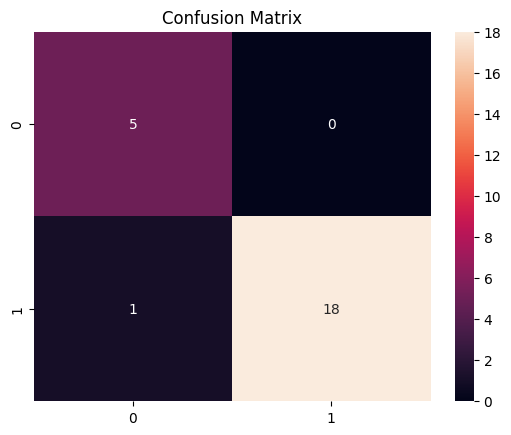

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



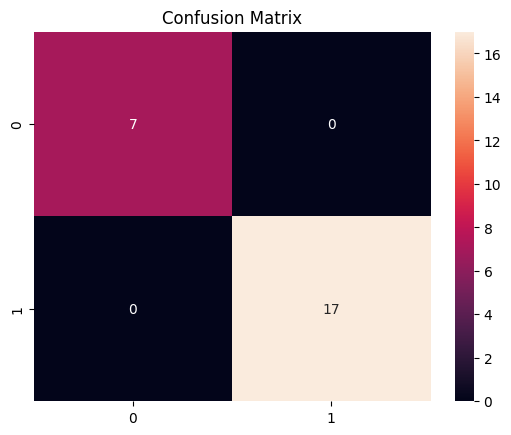

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.95      0.97        20

    accuracy                           0.96        24
   macro avg       0.90      0.97      0.93        24
weighted avg       0.97      0.96      0.96        24



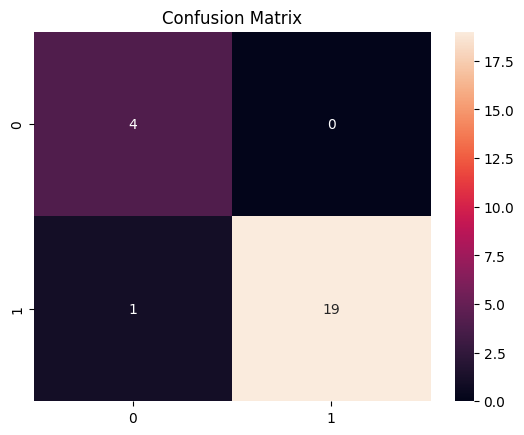

In [9]:
# Train and test using KNN modal
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn_scores = []
knn_recall = []
knn_precision = []
knn_report = []

for tr_ind, te_ind in kf.split(normalized_features):
    X_train, X_test = normalized_features[tr_ind], normalized_features[te_ind]
    Y_train, Y_test = status_data[tr_ind], status_data[te_ind]
    knn.fit(X_train,Y_train)
    knn_scores.append(knn.score(X_test, Y_test))
    knn_recall.append(recall_score(Y_test, knn.predict(X_test)))
    knn_precision.append(precision_score(Y_test, knn.predict(X_test)))
    knn_report.append(classification_report(Y_test, knn.predict(X_test)))
    
    # For each fold we calculate confusion matrix and visualize a heatmap
    y_pred = knn.predict(X_test)
    print("Confusion Matrix: ")
    cf_matrix=confusion_matrix(Y_test, y_pred)

    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))

    sns.heatmap(cf_matrix, annot=True)
    plt.title(f"Confusion Matrix")
    plt.show()

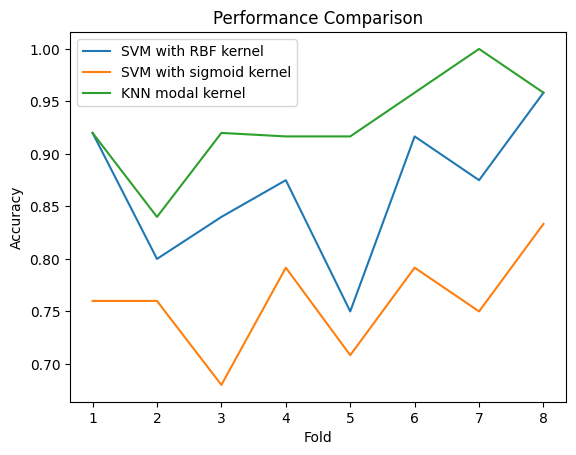

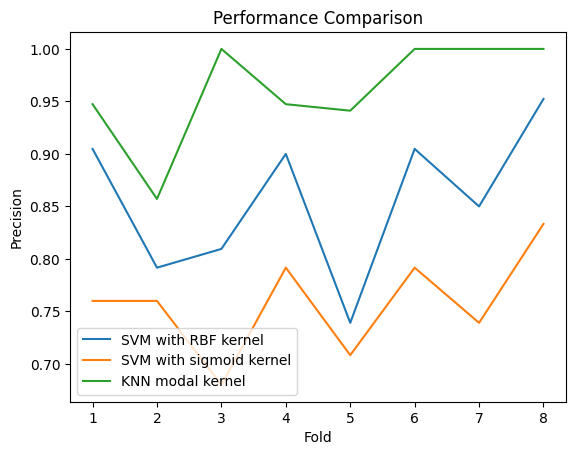

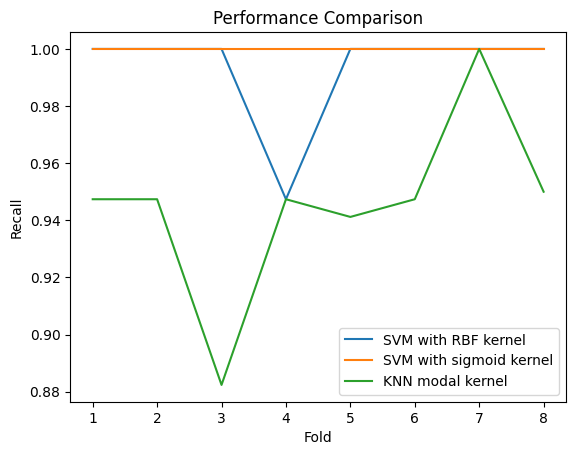

In [15]:
# Compare the accuracy of different model prediction
plt.plot(range(1, kf.get_n_splits() + 1), svm_rbf_score, label='SVM with RBF kernel')
plt.plot(range(1, kf.get_n_splits() + 1), svm_sig_score, label='SVM with sigmoid kernel')
plt.plot(range(1, kf.get_n_splits() + 1), knn_scores, label='KNN modal kernel')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Performance Comparison')
plt.legend()
plt.show()

# Compare the Precisions of different model prediction
plt.plot(range(1, kf.get_n_splits() + 1), svm_rbf_precision, label='SVM with RBF kernel')
plt.plot(range(1, kf.get_n_splits() + 1), svm_sig_precision, label='SVM with sigmoid kernel')
plt.plot(range(1, kf.get_n_splits() + 1), knn_precision, label='KNN modal kernel')
plt.xlabel('Fold')
plt.ylabel('Precision')
plt.title('Performance Comparison')
plt.legend()
plt.show()

# Compare the accuracy of different model prediction
plt.plot(range(1, kf.get_n_splits() + 1), svm_rbf_recall, label='SVM with RBF kernel')
plt.plot(range(1, kf.get_n_splits() + 1), svm_sig_recall, label='SVM with sigmoid kernel')
plt.plot(range(1, kf.get_n_splits() + 1), knn_recall, label='KNN modal kernel')
plt.xlabel('Fold')
plt.ylabel('Recall')
plt.title('Performance Comparison')
plt.legend()
plt.show()
    

In [14]:
# Print the accuracy of both the modals
print("KNN:: ")
print("-- Accuracy: ", np.mean(knn_scores))
print("-- Precision: ", np.mean(knn_precision))
print("-- Recall: ", np.mean(knn_recall))
print("\n")
print("SVM:: Sigmoid")
print("-- Accuracy: ", np.mean(svm_sig_score))
print("-- Precision: ", np.mean(svm_sig_precision))
print("-- Recall: ", np.mean(svm_sig_recall))
print("\n")
print("SVM:: RBF")
print("-- Accuracy: ", np.mean(svm_rbf_score))
print("-- Precision: ", np.mean(svm_rbf_precision))
print("-- Recall: ", np.mean(svm_rbf_recall))


KNN:: 
-- Accuracy:  0.92875
-- Precision:  0.9616320212295444
-- Recall:  0.9453753869969039


SVM:: Sigmoid
-- Accuracy:  0.759375
-- Precision:  0.7580163043478261
-- Recall:  1.0


SVM:: RBF
-- Accuracy:  0.8668750000000001
-- Precision:  0.8565282091097308
-- Recall:  0.993421052631579
